# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


ANSWER:

The OLS parameters are given by:
$$
\hat{\boldsymbol{\beta}}_{\text{OLS}} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$

Substituting the value of $\boldsymbol{y}$, we get:
$$
\hat{\boldsymbol{\beta}}_{\text{OLS}} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\beta} + (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}
$$

Since $(\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{X}$ is equal to the identity matrix:
$$
\hat{\boldsymbol{\beta}}_{\text{OLS}} = \boldsymbol{\beta} + (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}
$$

Taking the expextation os both sides, we get:
$$
\mathbb{E}(\hat{\boldsymbol{\beta}}_{\text{OLS}}) = \mathbb{E}\left(\boldsymbol{\beta} + (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}\right)
$$

Since the expectation value of a constant vector is the vector itself:
$$
\mathbb{E}(\hat{\boldsymbol{\beta}}_{\text{OLS}}) = \boldsymbol{\beta} + \mathbb{E}\left((\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}\right)
$$

We have that $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$, so it's expectation value is zero.
$$
\mathbb{E}\left((\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}\right) = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \mathbb{E}(\boldsymbol{\epsilon}) = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{0} = \boldsymbol{0}
$$

So, we are left with:
$$
\mathbb{E}(\hat{\boldsymbol{\beta}}_{\text{OLS}}) = \boldsymbol{\beta} + \boldsymbol{0} = \boldsymbol{\beta}
$$

**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


ANSWER:

Starting from:
$$
\hat{\boldsymbol{\beta}}_{\text{OLS}} = \boldsymbol{\beta} + (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}
$$

Taking the variance of both sides:
$$
\mathrm{Var}(\hat{\boldsymbol{\beta}}_{\text{OLS}}) = \mathrm{Var}\left((\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}\right)
$$

Since:
$$
\mathrm{Var}(A\boldsymbol{z}) = A \mathrm{Var}(\boldsymbol{z}) A^T,
$$

We have that the variance is:
$$
\mathrm{Var}(\hat{\boldsymbol{\beta}}_{\text{OLS}}) = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \mathrm{Var}(\boldsymbol{\epsilon}) \boldsymbol{X} (\boldsymbol{X}^T \boldsymbol{X})^{-1} 
$$

Looking into $\mathrm{Var}(\boldsymbol{\epsilon})$:
$$
\mathrm{Var}(\boldsymbol{\epsilon}) = \sigma^2 \boldsymbol{I}
$$

So:
$$
\mathrm{Var}(\hat{\boldsymbol{\beta}}_{\text{OLS}}) = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T (\sigma^2 \boldsymbol{I}) \boldsymbol{X} (\boldsymbol{X}^T \boldsymbol{X})^{-1}
$$

Simplifying it:
$$
\mathrm{Var}(\hat{\boldsymbol{\beta}}_{\text{OLS}}) = \sigma^2 (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{X} (\boldsymbol{X}^T \boldsymbol{X})^{-1}
$$
$$
\mathrm{Var}(\hat{\boldsymbol{\beta}}_{\text{OLS}}) = \sigma^2 (\boldsymbol{X}^T \boldsymbol{X})^{-1}
$$

## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


ANSWER:

The Ridge parameters are given by:
$$
\hat{\boldsymbol{\beta}}^{\text{Ridge}} = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}{pp}\right)^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$

Substituting $\boldsymbol{y}$:
$$
\hat{\boldsymbol{\beta}}^{\text{Ridge}} = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}{pp}\right)^{-1} \boldsymbol{X}^T \left( \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\epsilon} \right)
$$
$$
\hat{\boldsymbol{\beta}}^{\text{Ridge}} = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}{pp}\right)^{-1} \left(\boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{X}^T \boldsymbol{\epsilon}\right)
$$

Taking the expectation of both sides:
$$
\mathbb{E}[\hat{\boldsymbol{\beta}}^{\text{Ridge}}] = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}{pp}\right)^{-1} \left( \mathbb{E}[\boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\beta}] + \mathbb{E}[\boldsymbol{X}^T \boldsymbol{\epsilon}] \right)
$$

Since the expectation value of a constant vector is the vector itself and the expectation value of $\boldsymbol{\epsilon}$ is zero:
$$
\mathbb{E}[\hat{\boldsymbol{\beta}}^{\text{Ridge}}] = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}{pp}\right)^{-1} \left(\boldsymbol{X}^T \boldsymbol{X}\right) \boldsymbol{\beta}
$$

**b)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


ANSWER:

Starting from:
$$
\hat{\boldsymbol{\beta}}_{\text{Ridge}} = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}\right)^{-1} \left(\boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{X}^T \boldsymbol{\epsilon}\right)
$$

We have:
$$
\hat{\boldsymbol{\beta}}_{\text{Ridge}} = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}\right)^{-1} \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\beta} + \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}\right)^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}
$$

Taking the variance on both sides:
$$
\mathrm{Var}[\hat{\boldsymbol{\beta}}_{\text{Ridge}}] = \mathrm{Var}\left[\left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}\right)^{-1} \boldsymbol{X}^T \boldsymbol{\epsilon}\right]
$$

Applying:
$$
\mathrm{Var}[\mathbf{A} \boldsymbol{z}] = \mathbf{A} \mathrm{Var}[\boldsymbol{z}] \mathbf{A}^T
$$

We get:
$$
\mathrm{Var}[\hat{\boldsymbol{\beta}}_{\text{Ridge}}] = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}\right)^{-1} \boldsymbol{X}^T \mathrm{Var}[\boldsymbol{\epsilon}] \boldsymbol{X} \left[\left(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}\right)^{-1}\right]^T
$$

Again, since $\mathrm{Var}[\boldsymbol{\epsilon}] = \sigma^2 \mathbf{I}$:
$$
\mathrm{Var}[\hat{\boldsymbol{\beta}}_{\text{Ridge}}] = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}\right)^{-1} \boldsymbol{X}^T (\sigma^2 \mathbf{I}) \boldsymbol{X} \left[\left(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}\right)^{-1}\right]^T
$$

Simplifying it:
$$
\mathrm{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}] = \sigma^2 \left[\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}\right]^{-1} \mathbf{X}^{T} \mathbf{X} \left[\left(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}\right)^{-1}\right]^T
$$

## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

In order to arrive at the equation for the bias, we have to approximate the unknown function $f$ with the output/target values $y$.


ANSWER:

Expanding the cost function in terms of the expectation value:
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[y^2\right]-2\mathbb{E}\left[\boldsymbol{y}\boldsymbol{\tilde{y}}\right]+\mathbb{E}\left[\boldsymbol{\tilde{y}}^2\right]
$$

We can reqrite the first term as:
$$
\mathbb{E}\left[y^2\right]=\mathbb{E}\left[\left(f+\epsilon\right)^2\right]=\mathbb{E}\left[f^2\right]+2\mathbb{E}\left[f\epsilon\right]+\mathbb{E}\left[\epsilon^2\right]=f^2+\sigma^2
$$

The second term is:
$$
\mathbb{E}\left[\boldsymbol{y}\boldsymbol{\tilde{y}}\right]=\mathbb{E}\left[\left(f+\epsilon\right)\boldsymbol{\tilde{y}}\right]=\mathbb{E}\left[f\boldsymbol{\tilde{y}}\right]+\mathbb{E}\left[\epsilon\boldsymbol{\tilde{y}}\right]=f\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]
$$

And the third can be writen as:
$$
\mathbb{E}\left[\boldsymbol{\tilde{y}}^2\right]=\mathrm{var}[\tilde{y}]+\left(\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2
$$

Going back to the initial equation:
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=f^2+\sigma^2-2f\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]+\mathrm{var}[\tilde{y}]+\left(\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2
$$
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=f^2-2f\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]+\left(\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2+\mathrm{var}[\tilde{y}]+\sigma^2
$$
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[\left(f-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]+\mathrm{var}[\tilde{y}]+\sigma^2
$$
Aproximating $f$ with $y$:
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]+\mathrm{var}[\tilde{y}]+\sigma^2
$$

**b)** Explain what the terms mean and discuss their interpretations.


ANSWER:

The first term is the bias of the model, and it corresponds to how far the expectation value predicted by the model is from the true expecttion value. The second terms is the variance of the model, which reflects the sensitivity of our model to outliers in the training data. The last term is the variance of the noise to which our data is subjected.

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [8]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
# The definition of targets has been updated, and was wrong earlier in the week.
targets = np.random.rand(1, n)

mse = np.mean((predictions - targets) ** 2)
bias = np.mean((targets-np.mean(predictions))**2)
variance = np.mean((predictions-np.mean(predictions))**2)

print(f"MSE: {mse}, Bias: {bias}, Variance: {variance}")
print('Difference MSE - (Bias + Variance): ', abs(mse - (bias + variance)))

MSE: 218.8872114146699, Bias: 210.53906601792244, Variance: 8.339254352565794
Difference MSE - (Bias + Variance):  0.00889104418166653


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.

In [11]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 1 + 20
# The definition of targets has been updated, and was wrong earlier in the week.
targets = np.random.rand(1, n)

mse = np.mean((predictions - targets) ** 2)
bias = np.mean((targets-np.mean(predictions))**2)
variance = np.mean((predictions-np.mean(predictions))**2)

print(f"MSE: {mse}, Bias: {bias}, Variance: {variance}")
print('Difference MSE - (Bias + Variance): ', abs(mse - (bias + variance)))

MSE: 398.24117420791015, Bias: 398.1575037323217, Variance: 0.0834881570524094
Difference MSE - (Bias + Variance):  0.0001823185360763091


**c)** Change the prediction values in some way to increase the variance while decreasing the bias.

In [12]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 20 + 1
# The definition of targets has been updated, and was wrong earlier in the week.
targets = np.random.rand(1, n)

mse = np.mean((predictions - targets) ** 2)
bias = np.mean((targets-np.mean(predictions))**2)
variance = np.mean((predictions-np.mean(predictions))**2)

print(f"MSE: {mse}, Bias: {bias}, Variance: {variance}")
print('Difference MSE - (Bias + Variance): ', abs(mse - (bias + variance)))

MSE: 142.71843136117076, Bias: 109.37342539655793, Variance: 33.35283034975722
Difference MSE - (Bias + Variance):  0.007824385144402868


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

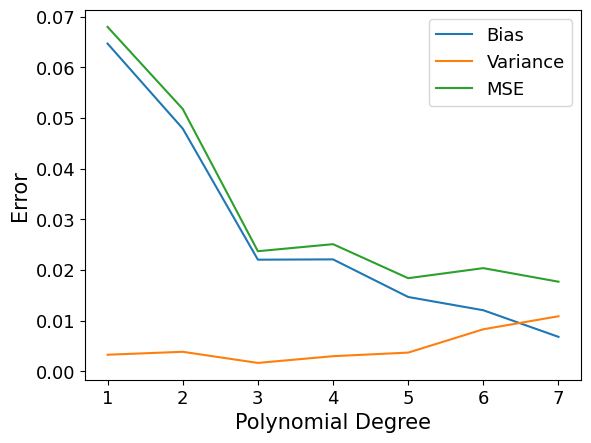

In [32]:
n = 100
bootstraps = 1000

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)

biases = []
variances = []
mses = []
degrees = range(1, 8)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

for p in degrees:
    predictions = np.empty((y_test.shape[0], bootstraps))
    poly = PolynomialFeatures(degree=p)
    for b in range(bootstraps):
       x_, y_ = resample(x_train, y_train)
       X_ = poly.fit_transform(x_)
       # fit your model on the sampled data
       model = LinearRegression().fit(X_, y_)
       # make predictions on the test data
       X_test_poly = poly.transform(x_test)
       predictions[:,b] = model.predict(X_test_poly).ravel()

    biases.append(np.mean( (y_test - np.mean(predictions, axis=1, keepdims=True))**2 ))
    variances.append(np.mean( np.var(predictions, axis=1, keepdims=True) ))
    mses.append(np.mean( np.mean((y_test - predictions)**2, axis=1, keepdims=True) ))

plt.plot(degrees, biases, label='Bias')
plt.plot(degrees, variances, label='Variance')
plt.plot(degrees, mses, label='MSE')
plt.xlabel('Polynomial Degree', fontsize=15) 
plt.ylabel('Error', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(degrees, fontsize=13)
plt.legend(fontsize=13)
plt.savefig("bias_variance.png", dpi=300, bbox_inches='tight')
plt.show()

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

ANSWER:
For a low complexity, the MSE of the model is dominated by the bias term, since it is not complex enough to capture the features of the data. However, as we increase complexity, the error tends to be dominated by the variance, since it becomes more sensitive to the outliers of the training data.

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).

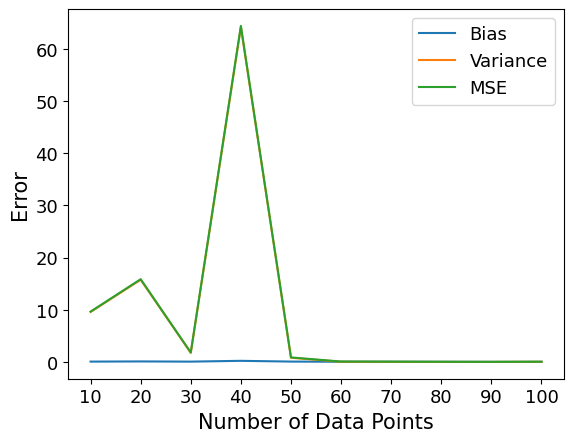

In [37]:
n_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bootstraps = 1000

biases = []
variances = []
mses = []
poly = PolynomialFeatures(degree=5)

np.random.seed(2018)

for n in n_data:
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
    predictions = np.empty((y_test.shape[0], bootstraps))
    for b in range(bootstraps):
       x_, y_ = resample(x_train, y_train)
       X_ = poly.fit_transform(x_)
       # fit your model on the sampled data
       model = LinearRegression().fit(X_, y_)
       # make predictions on the test data
       X_test_poly = poly.transform(x_test)
       predictions[:,b] = model.predict(X_test_poly).ravel()

    biases.append(np.mean( (y_test - np.mean(predictions, axis=1, keepdims=True))**2 ))
    variances.append(np.mean( np.var(predictions, axis=1, keepdims=True) ))
    mses.append(np.mean( np.mean((y_test - predictions)**2, axis=1, keepdims=True) ))

plt.plot(n_data, biases, label='Bias')
plt.plot(n_data, variances, label='Variance')
plt.plot(n_data, mses, label='MSE')
plt.xlabel('Number of Data Points', fontsize=15) 
plt.ylabel('Error', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(n_data, fontsize=13)
plt.legend(fontsize=13)
plt.savefig("bias_variance_n_data.png", dpi=300, bbox_inches='tight')
plt.show()

ANSWER: The error is basically dominated by the variance, and decreases as we add more data.

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

ANSWER: It makes sure that all features contribute equally, improves convergence and stability. 

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

ANSWER: Since OLS estimates the coefficients based on the best linear combination of features, the prediction will be the same even if the coefficients are different with or without scaling.  

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

ANSWER: Ridge adds a penalty term to the cost function, which is dependant on the scale of the features. As such, it can vary significantly if the data is scaled or not.

**d)** Why do we say that the Ridge method gives a biased model?

ANSWER: This bias comes from the addition of the penalty term mentioned above.

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

ANSWER: The MSE of the OLS method is not affected by scaling of the feature matrix, but it is by scaling the target data. That is because the first changes the coefficients but not the predictions, and the latter results in different prediction values. 

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

ANSWER: The R2 score of the OLS method is not affected by the scalling of the feature matrix but it is affected by the scalling of the target data. This score is related to the variance explained by the model, which does not change if the feature matrix is scaled, but dependent on the variance of the target variable.

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

ANSWER: A R2 score equal to zero indicates that the model is not able to explain the variance of the target variable. A R2 score equal to 0.5 means that 50% of that variance is explained. A R2 score equal to 1 indicates that the model is able to capture all the variability of the target variable.

**h)** What is an advantage of the R2 score over the MSE?

ANSWER: It makes it easier to compare different models, since it is normalized between 0 and 1, with clear interpretation of the score.